In [234]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy import stats
from sklearn import model_selection

In [235]:
digits = load_digits()

In [236]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [237]:
X_all = data
X_train , X_test , y_train , y_test =model_selection . train_test_split ( digits.data , digits.target , test_size = 0.4 , random_state = 0)

In [238]:
X_train1= []
X_test1= []
y_train1= []
y_test1= []
for i in range(len(X_train)):
    if y_train[i] ==1:
        X_train1.append(X_train[i])
        y_train1.append(y_train[i])
for i in range(len(X_test)):
    if y_test[i] ==1:
        X_test1.append(X_test[i])
        y_test1.append(y_test[i])
X_train1 = np.array(X_train1)
X_test1 = np.array(X_test1)
y_train1 = np.array(y_train1)
y_test1 = np.array(y_test1)

In [239]:
X_train7= []
X_test7= []
y_train7= []
y_test7= []
for i in range(len(X_train)):
    if y_train[i] ==7:
        X_train7.append(X_train[i])
        y_train7.append(y_train[i])
for i in range(len(X_test)):
    if y_test[i] ==7:
        X_test7.append(X_test[i])
        y_test7.append(y_test[i])
X_train7 = np.array(X_train7)
X_test7 = np.array(X_test7)
y_train7 = np.array(y_train7)
y_test7 = np.array(y_test7)

In [240]:
X_trainA= []
X_testA= []
y_trainA= []
y_testA= []
for i in range(len(X_train)):
    if y_train[i] ==1 or y_train[i] == 7:
        X_trainA.append(X_train[i])
        y_trainA.append(y_train[i])
for i in range(len(X_test)):
    if y_test[i] ==1 or y_test[i] == 7:
        X_testA.append(X_test[i])
        y_testA.append(y_test[i])
X_trainA = np.array(X_trainA)
X_testA = np.array(X_testA)
y_trainA = np.array(y_trainA)
y_testA = np.array(y_testA)

# 3.1

In [241]:
index1_16 = np.array(np.where(X_train1 ==16))
index1_0 = np.array(np.where(X_train1 ==0))
index7_16 = np.array(np.where(X_train7 >13))
index7_0 = np.array(np.where(X_train7 ==0))


In [242]:
def reduce_dim(x):
    index1 = np.array([])
    index2 = np.array([])
    for i in range(64):
        m = np.count_nonzero(index1_16[1,:]==i) + np.count_nonzero(index7_0[1,:]==i)
        n = np.count_nonzero(index1_0[1,:]==i) + np.count_nonzero(index7_16[1,:]==i)
        if m >123: #Found by experimenting, could be done automatically
            index1 = np.append(index1,i)
        if n >90: #Found by experimenting, could be done automatically
            index2 = np.append(index2,i)
    index1 = index1.astype('int64')
    index2 = index2.astype('int64')
    feature_1=np.mean( x[:,index1],axis = 1)
    feature_2= np.mean( x[:,index2],axis = 1)
    return np.stack((feature_1, feature_2),axis=1)


In [243]:
reduced_x_train = reduce_dim(X_trainA)
reduced_x1 = reduce_dim(X_train1)
reduced_x7 = reduce_dim(X_train7)
reduced_x_test = reduce_dim(X_testA)

# 3.2

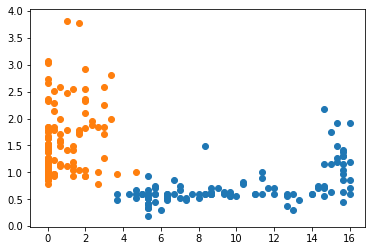

In [244]:
plt.scatter(reduced_x1[:,0],reduced_x1[:,1] )
plt.scatter(reduced_x7[:,0],reduced_x7[:,1] )

# 4.1

In [245]:
def dist_vec(test_features, mean):
    distance = np.sqrt(np.sum(np.square(np.subtract(test_features[:, np.newaxis], mean)), axis=2))
    return distance

In [246]:
def nearest_mean(training_features, training_labels, test_features):
    x1_mean = np.mean(training_features[1 == training_labels],axis = 0)
    x7_mean = np.mean(training_features[7 == training_labels],axis = 0)
    distance_matrix1 = dist_vec(test_features,x1_mean)
    distance_matrix7 = dist_vec(test_features,x7_mean)
    label=np.where(np.greater(distance_matrix1, distance_matrix7), 7,1)
    return label.reshape(len(label))

In [247]:
predicted_labels_nm = nearest_mean(reduced_x_train, y_trainA, reduced_x_test)

In [248]:
error_nm = np.mean(np.where(predicted_labels_nm== y_testA, 0,1))

In [249]:
error

array([0.02173913, 0.01449275, 0.01449275])

# 4.2

# 5.1

In [250]:
def fit_qda(training_features, training_labels):
    x1_mean = np.mean(training_features[1 == training_labels],axis = 0)
    x7_mean = np.mean(training_features[7 == training_labels],axis = 0)
    D = len(x1_mean)
    mu = np.stack((x1_mean, x7_mean), axis = 0)
    scatter_matrix1 = np.zeros((D,D))
    scatter_matrix7 = np.zeros((D,D))
    for i in range(len(training_features)):
        x = training_features[i, :] - x1_mean
        for k in range(D):
            for m in range(D):
                scatter_matrix1[k,m] = scatter_matrix1[k,m]+  x[k]*x[m]
    for i in range(len(training_features)):
        x = training_features[i, :] - x7_mean
        for k in range(D):
            for m in range(D):
                scatter_matrix7[k,m] = scatter_matrix7[k,m]+  x[k]*x[m]
    covmat1 = scatter_matrix1/(len(training_features))
    covmat7 = scatter_matrix7/(len(training_features))
    covmat = np.stack((covmat1, covmat7),axis = 0)
    p1 = len(training_features[1 == training_labels])/len(training_features)
    p7 = len(training_features[7 == training_labels])/len(training_features)
    p = np.array([p1,p7])
    return mu, covmat,p

In [251]:
mu_qda, covmat_qda,p_qda = fit_qda(reduced_x_train, y_trainA)

# 5.2

In [252]:
def predict_qda(mu, covmat, p, test_features):
    y= []
    for i in range(len(mu)):
        x = np.array([])
        bk = 0.5*np.log(LA.det(2*np.pi*covmat[i]))- np.log(p[i])
        for k in range(len(test_features)):
            x = np.append(x,0.5 *(test_features[k,:]-mu[i]).dot(LA.inv(covmat[i]).dot((test_features[k,:]-mu[i]).T))  + bk)
        y.append(x)
    return np.where(np.argmin(y,axis=0)==0,1,7)

In [253]:
predicted_labels_qda = predict_qda(mu_qda,covmat_qda, p_qda, reduced_x_test)

In [254]:
error_qda = np.mean(np.where(predicted_labels_qda== y_testA, 0,1))

In [255]:
error_qda

0.014492753623188406

# 6

In [256]:
def fit_lda(training_features, training_labels):
    x1_mean = np.mean(training_features[1 == training_labels],axis = 0)
    x7_mean = np.mean(training_features[7 == training_labels],axis = 0)
    D = len(x1_mean)
    mu = np.stack((x1_mean, x7_mean), axis = 0)
    scatter_matrix1 = np.zeros((D,D))
    scatter_matrix7 = np.zeros((D,D))
    for i in range(len(training_features)):
        x = training_features[i, :] - x1_mean
        for k in range(D):
            for m in range(D):
                scatter_matrix1[k,m] = scatter_matrix1[k,m]+  x[k]*x[m]
    for i in range(len(training_features)):
        x = training_features[i, :] - x7_mean
        for k in range(D):
            for m in range(D):
                scatter_matrix7[k,m] = scatter_matrix7[k,m]+  x[k]*x[m]
    covmat1 = scatter_matrix1/(len(training_features))
    covmat7 = scatter_matrix7/(len(training_features))
    covmat = (covmat1 + covmat7)/2
    p1 = len(training_features[1 == training_labels])/len(training_features)
    p7 = len(training_features[7 == training_labels])/len(training_features)
    p = np.array([p1,p7])
    return mu, covmat,p

In [257]:
mu_lda, covmat_lda,p_lda = fit_lda(reduced_x_train, y_trainA)

In [258]:
def predict_lda(mu, covmat, p, test_features):
    y= []
    D = len(mu[0])
    b = np.array([])
    w0 = (mu[0]).dot(LA.inv(covmat)) #la inversa es positivo
    w1 = (mu[1]).dot(LA.inv(covmat))
    w = w1-w0
    b0 = 0.5*np.log(LA.det(2*np.pi*covmat))- np.log(p[0]) + 0.5*np.matmul(np.matmul(mu[0],LA.inv(covmat)),mu[0].T)
    b1 = 0.5*np.log(LA.det(2*np.pi*covmat))- np.log(p[1]) + 0.5*np.matmul(np.matmul(mu[1],LA.inv(covmat)),mu[1].T)
    b = b0 - b1
    y = w[np.newaxis].dot(test_features[:,:,np.newaxis])+ b
    return np.where(y<0,1,7)[0,:,0]

In [259]:
predicted_labels_lda = predict_lda(mu_lda,covmat_lda, p_lda, reduced_x_test)

In [260]:
error_lda = np.mean(np.where(predicted_labels_lda== y_testA, 0,1))
error_lda

0.014492753623188406

In [261]:
error = np.array([error_nm, error_qda, error_lda])

In [262]:
error

array([0.02173913, 0.01449275, 0.01449275])

In [263]:
comparisson_qda_lda = np.mean(np.where(predicted_labels_lda== predicted_labels_qda, 0,1))

In [264]:
comparisson_qda_lda

0.0